<a href="https://colab.research.google.com/github/udaanie/UCSC_master_research/blob/master/Time_Series_forecasting_using_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pmdarima

In [ ]:
#imprting required packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")
from pandas import DataFrame
import seaborn as sns
from pmdarima import auto_arima
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [ ]:
#Loading the dataset
electricity=pd.read_csv("Data Set for research.csv",index_col=['Year'],parse_dates=['Year'])

In [ ]:
#Read the dataset
print('Shape of Data',electricity.shape)
electricity.head()

Shape of Data (50, 3)


,Consumers,GDP,Sales
Year,,,
1969-01-01,1888,1859465021,297
1970-01-01,2116,1801344538,331
1971-01-01,2235,1965546218,373
1972-01-01,2482,2296470588,419
1973-01-01,2658,2369308600,437


## **Data Preprocessing**

In [ ]:
#Search for missing values
electricity.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50 entries, 1969-01-01 to 2018-01-01
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Consumers  50 non-null     int64
 1   GDP        50 non-null     int64
 2   Sales      50 non-null     int64
dtypes: int64(3)
memory usage: 1.6 KB


In [ ]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
missing_values = missing_values_table(electricity)

Your selected dataframe has 3 columns.
There are 0 columns that have missing values.


In [ ]:
#Dropping unwanted columns
drop_cols = ['Consumers','GDP']
electricity.drop(drop_cols, axis=1, inplace=True)
electricity.head(10)

,Sales
Year,
1969-01-01,297
1970-01-01,331
1971-01-01,373
1972-01-01,419
1973-01-01,437
1974-01-01,463
1975-01-01,522
1976-01-01,513
1977-01-01,515


In [ ]:
electricity.describe()

,Sales
count,50.000000
mean,1614.860000
std,1140.496795
min,297.000000
25%,693.250000
50%,1292.000000
75%,2500.000000
max,4289.000000


In [ ]:
series_value = electricity.values

## **Plotting the Time Plot**

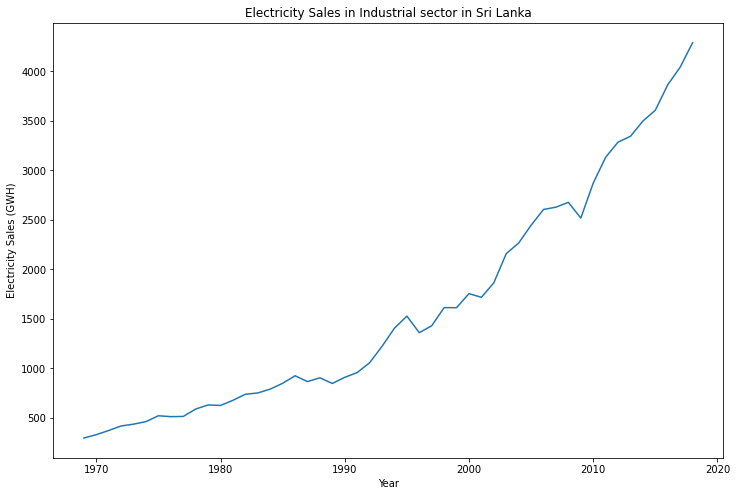

In [ ]:
#Plotting the Time Plot

plt.figure(figsize=(12, 8))
plt.plot(electricity.Sales)
plt.title('Electricity Sales in Industrial sector in Sri Lanka')
plt.ylabel('Electricity Sales (GWH)',)
plt.xlabel('Year')
plt.grid(False)
plt.show()

## **Splitting the dataset into training and testing**

In [ ]:
print(electricity.shape)
train=electricity.iloc[:-10]
test=electricity.iloc[-10:]
print('Train shape: ',train.shape)
print('Test shape: ',test.shape)

(50, 1)
Train shape:  (40, 1)
Test shape:  (10, 1)


## **Checking the stationary of the series**

In [ ]:
#Checking the stationary of the series
#Determing rolling statistics

rolmean = electricity.rolling(window=3).mean()
rolstd = electricity.rolling(window=3).std()
print(rolmean, rolstd)

                  Sales
Year                   
1969-01-01          NaN
1970-01-01          NaN
1971-01-01   333.666667
1972-01-01   374.333333
1973-01-01   409.666667
1974-01-01   439.666667
1975-01-01   474.000000
1976-01-01   499.333333
1977-01-01   516.666667
1978-01-01   539.333333
1979-01-01   578.666667
1980-01-01   615.666667
1981-01-01   645.000000
1982-01-01   681.000000
1983-01-01   723.000000
1984-01-01   760.666667
1985-01-01   797.666667
1986-01-01   855.666667
1987-01-01   881.000000
1988-01-01   899.333333
1989-01-01   873.333333
1990-01-01   887.666667
1991-01-01   905.333333
1992-01-01   975.000000
1993-01-01  1079.333333
1994-01-01  1228.666667
1995-01-01  1385.666667
1996-01-01  1431.666667
1997-01-01  1440.000000
1998-01-01  1468.666667
1999-01-01  1552.666667
2000-01-01  1660.666667
2001-01-01  1695.333333
2002-01-01  1779.333333
2003-01-01  1914.000000
2004-01-01  2096.666667
2005-01-01  2290.333333
2006-01-01  2439.000000
2007-01-01  2559.666667
2008-01-01  2636

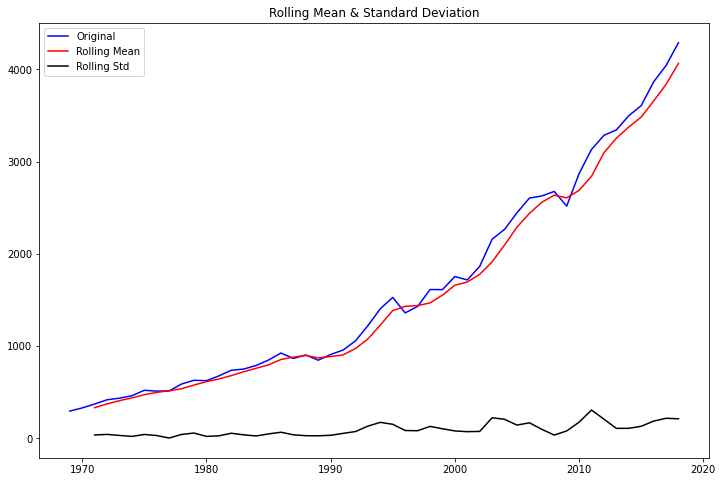

In [ ]:
#Plot rolling statistics

plt.figure(figsize=(12, 8))
original = plt.plot(electricity, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend()
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
#Perform Dikey-Fuller test

from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(electricity.Sales.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: 3.590168
p-value: 1.000000
Critical Values:
	1%: -3.571
	5%: -2.923
	10%: -2.599


## **Turning non stationary series to Stationary series**

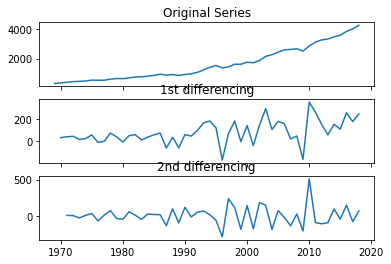

In [ ]:
#Turning non stationary series to Stationary series
#Differentiation the series

#Original Series
fig, axes = plt.subplots(3, 1, sharex=True)
axes[0].plot(electricity); axes[0].set_title('Original Series')

# 1st Diffrencing

axes[1].plot(electricity.diff()); axes[1].set_title('1st differencing')

# 2nd Diffrencing

axes[2].plot(electricity.diff().diff()); axes[2].set_title('2nd differencing')

plt.show()

In [ ]:
#Perform Dikey-Fuller test

result = adfuller(electricity.Sales.diff().diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.636959
p-value: 0.000110
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610


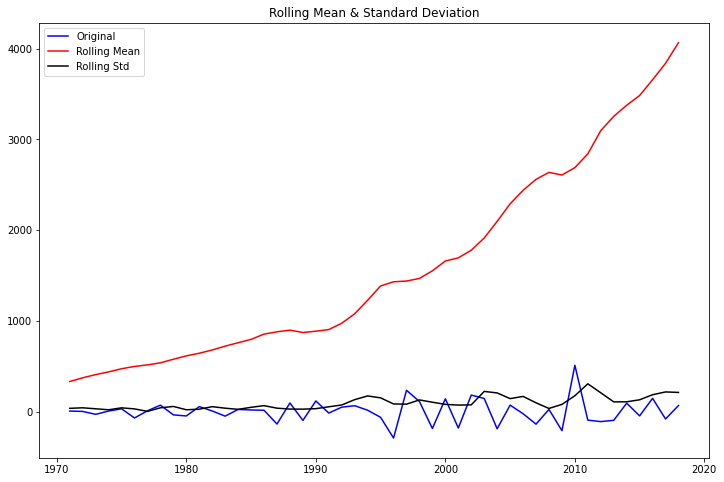

In [ ]:
#Differentiation the series

plt.figure(figsize=(12, 8))
original = plt.plot(electricity.Sales.diff().diff().dropna(), color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend()
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

## **ARIMA - Autoregressive(p) Intergrated (d) Moving Average(q)**


## **Plotting the ACF(q) and PACF(p) plots**

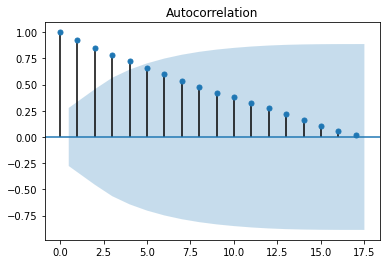

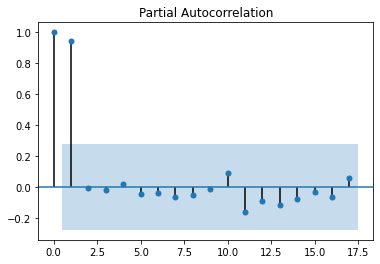

In [ ]:
#Plotting the ACF and PACF plots
plot_acf(electricity)
plt.show()

plot_pacf((electricity))
plt.show()


## **p = 0   d = 2   q = 1**

## **Fitting the Model to the training dataset**

In [ ]:
model = ARIMA(train,order=(0,2,1))

In [ ]:
model_fit = model.fit(disp=0)

In [ ]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.Sales   No. Observations:                   38
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -220.521
Method:                       css-mle   S.D. of innovations             76.405
Date:                Sun, 12 Sep 2021   AIC                            447.042
Time:                        05:53:26   BIC                            451.955
Sample:                    01-01-1971   HQIC                           448.790
                         - 01-01-2008                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.6694      1.087      2.456      0.014       0.539       4.800
ma.L1.D2.Sales    -1.0000      0.076    -13.240      0.000      -1.148      -0.852
                                    

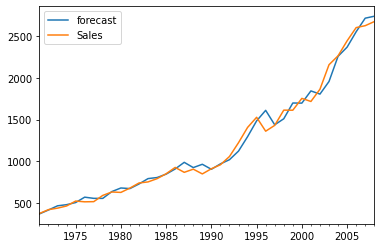

In [ ]:
electricity['Forecast'] = model_fit.plot_predict(dynamic=False)
plt.show()

## **Testing the Model and make prediction**

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model_fit.predict(start=start,end=end,typ='levels')

print(pred)

2009-01-01    2793.065424
2010-01-01    2911.800278
2011-01-01    3033.204563
2012-01-01    3157.278280
2013-01-01    3284.021427
2014-01-01    3413.434005
2015-01-01    3545.516013
2016-01-01    3680.267453
2017-01-01    3817.688324
2018-01-01    3957.778625
Freq: AS-JAN, dtype: float64


In [ ]:
#Actual values
test

,Sales
Year,
2009-01-01,2518
2010-01-01,2871
2011-01-01,3132
2012-01-01,3285
2013-01-01,3344
2014-01-01,3498
2015-01-01,3607
2016-01-01,3864
2017-01-01,4042


In [ ]:
electricity3 = pd.concat([test,pred],axis=1)
electricity3.columns = ['Actual_Sales','Forecst_Sales']
electricity3.head(10)

,Actual_Sales,Forecst_Sales
2009-01-01,2518,2793.065424
2010-01-01,2871,2911.800278
2011-01-01,3132,3033.204563
2012-01-01,3285,3157.278280
2013-01-01,3344,3284.021427
2014-01-01,3498,3413.434005
2015-01-01,3607,3545.516013
2016-01-01,3864,3680.267453
2017-01-01,4042,3817.688324
2018-01-01,4289,3957.778625


## **Plotting the ARIMA Prediction for Test set**

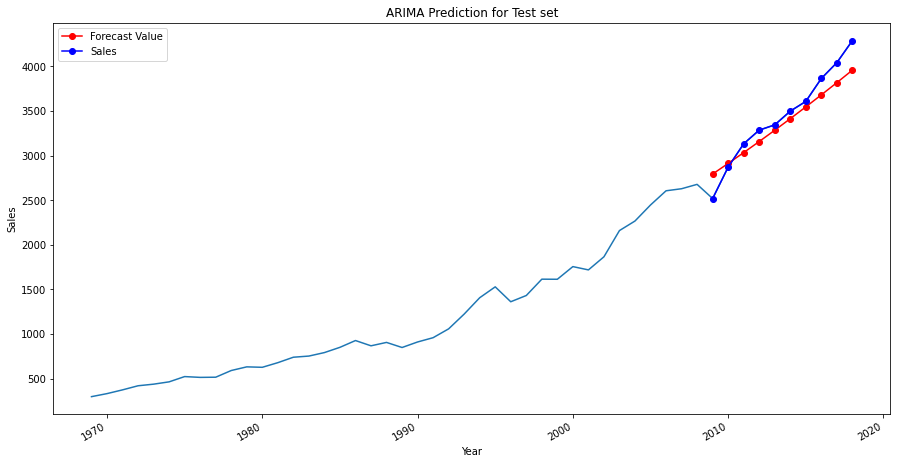

In [ ]:
fig, ax = plt.subplots(figsize = (15,8))
chart = sns.lineplot(x='Year', y='Sales', data = electricity)
chart.set_title('ARIMA Prediction for Test set')
pred.plot(ax=ax, color = 'red', marker = "o", legend = True ,label = 'Forecast Value')
test.plot(ax=ax, color = 'blue', marker = "o", legend = True , label = 'Actual Value')

## **Evaluating the ARIMA (0,2,1) model**

In [ ]:
rmse = np.sqrt(mean_squared_error(test,pred))
print('Root Mean Squared Error: %.3f' % rmse)

Root Mean Squared Error: 176.553


In [ ]:
#Calculating the R squared value
from sklearn.metrics import r2_score
r2 =  r2_score(test,pred)
print('r2 score: %.3f' % r2)

r2 score: 0.880


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape = mean_absolute_percentage_error(test, pred)
print('Mean Absolute Precentage Error: %.3f' % mape)

Mean Absolute Precentage Error: 15.418


## **Finding the best p,d,q values from Auto Arima - Model Validaion**

In [ ]:
#finding the best pdq values from auto ARIMA
stepwise_fit = auto_arima(electricity['Sales'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=605.843, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=597.441, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=582.578, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=584.571, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=584.569, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=586.513, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.628 seconds


# **Use the ARIMA(0,2,1)  model to make Predictions**




In [ ]:
number_of_rows = len(electricity)
print(number_of_rows)

50


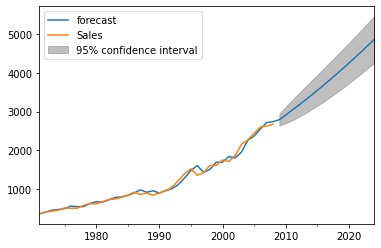

In [ ]:
future = model_fit.plot_predict(2,55)
x=model_fit.forecast(steps=5)

# **Use the ARIMA(0,2,1)n model to make Predictions**

In [ ]:
start2=len(test)
end2=len(train)+len(test)+5
pred_future=model_fit.predict(start=start2,end=end2,typ='levels')
print(pred_future)

1979-01-01     635.902710
1980-01-01     679.081870
1981-01-01     671.925676
1982-01-01     727.101301
1983-01-01     791.686016
1984-01-01     804.520732
1985-01-01     845.288780
1986-01-01     907.252662
1987-01-01     987.024878
1988-01-01     924.026260
1989-01-01     963.694309
1990-01-01     903.579024
1991-01-01     968.554216
1992-01-01    1018.743910
1993-01-01    1122.076649
1994-01-01    1294.951219
1995-01-01    1485.062601
1996-01-01    1611.383471
1997-01-01    1437.779440
1998-01-01    1510.206748
1999-01-01    1699.455256
2000-01-01    1698.242845
2001-01-01    1844.743152
2002-01-01    1806.451859
2003-01-01    1957.895476
2004-01-01    2260.479746
2005-01-01    2370.306899
2006-01-01    2555.078916
2007-01-01    2718.097565
2008-01-01    2741.396007
2009-01-01    2793.065424
2010-01-01    2911.800278
2011-01-01    3033.204563
2012-01-01    3157.278280
2013-01-01    3284.021427
2014-01-01    3413.434005
2015-01-01    3545.516013
2016-01-01    3680.267453
2017-01-01  